<div style="text-align:center; font-family:Tahoma, Arial; line-height:1.8;">

  <div style="font-size:42px; font-weight:bold; color:#0F8298;">
    Machine Learning 08
  </div>

  <div style="font-size:28px; font-weight:600; color:#6C3BAA; margin-top:8px;">
    Classification / Decision Tree 
  </div>

  <div style="font-size:18px; color:#4b4f9c;">
</div>
درخت تصمیم

<hr style="width:60%; margin:20px auto; border:1px solid #ddd;">

<font color=497890 size=3>

اهداف: پس از تکمیل این تمرین، شما قادر خواهید بود

در این فصل به شما نشان خواهیم داد که چگونه یک «درخت تصمیم» بسازید

و با مفهوم جنگل تصادفی آشنا میشوید


<font color=GREEN size=5>
HAKAN Fatemi (www.hooko.ir)


____
</div> </div>

## طبقه‌بند درخت تصمیم

### مرور سریع
- **درخت تصمیم** یک مدل یادگیری ماشین `نظارت‌شده` است که هم برای وظایف طبقه‌بندی و هم رگرسیون استفاده می‌شود
- این مدل با تقسیم مجموعه داده به زیرمجموعه‌های کوچکتر، تصمیم‌ها را بر اساس ویژگی‌ها مدل می‌کند
- هر `گره` در درخت نمایانگر یک `ویژگی` است و `یال‌ها` نشان‌دهنده `تصمیم` بر اساس مقدار یک ویژگی هستند 
- هدف ایجاد مدلی است که با یادگیری `قوانین تصمیم` از ویژگی‌ها، مقدار متغیر هدف را پیش‌بینی کند 

### نحوه عملکرد
- یک درخت تصمیم به صورت بازگشتی داده‌ها را بر اساس `مهم‌ترین ویژگی` به دو یا چند مجموعه همگن تقسیم می‌کند

 این تقسیم‌بندی توسط معیارهای مختلفی مانند افزایش اطلاعات $(IG)$ یا `ناخالصی جینی` هدایت می‌شود

### روش‌های درخت تصمیم
1. **افزایش اطلاعات $(IG)$**
    - افزایش اطلاعات، کاهش آنتروپی (عدم قطعیت) پس از تقسیم مجموعه داده بر اساس یک ویژگی را اندازه‌گیری می‌کند
    - آنتروپی به صورت زیر محاسبه می‌شود:
    $$
    Entropy(S) = - \sum p(x)log_2p(x)
    $$
    - هرچه افزایش اطلاعات بیشتر باشد، ویژگی در تقسیم داده‌ها بهتر عمل می‌کند

2. **ناخالصی جینی**
    - احتمال طبقه‌بندی نادرست را در صورتی که یک نمونه تصادفی بر اساس توزیع برچسب‌ها طبقه‌بندی شود، اندازه‌گیری می‌کند
    - ناخالصی جینی به صورت زیر محاسبه می‌شود :
    $$
    Gini(S) = 1 - \sum p(x)^2
    $$
    - مقادیر پایین‌تر جینی نشان‌دهنده خلوص بیشتر در تقسیم‌ها هستند

### مراحل ایجاد یک درخت تصمیم
1. **انتخاب بهترین ویژگی**: مجموعه داده بر اساس ویژگی‌ای تقسیم می‌شود که بهترین جداسازی را فراهم کند
2. **محاسبه آنتروپی یا جینی**: این معیارها به تعیین میزان خلوص زیرمجموعه‌ها کمک می‌کنند
3. **تقسیم بازگشتی**: درخت به صورت بازگشتی مجموعه داده را تقسیم می‌کند تا زمانی که یک شرط توقف برقرار شود (مانند حداکثر عمق یا حداقل نمونه‌ها)
4. **تخصیص برچسب‌ها**: هنگامی که درخت به گره‌های برگ می‌رسد، یک برچسب کلاس پیش‌بینی شده اختصاص می‌دهد

*در ادامه از روش $IG$ برای پیاده‌سازی یک درخت تصمیم ساده (با حداکثر عمق 1) از پایه استفاده خواهیم کرد.*

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class DecisionStump:
    """
    A decision stump classifier for multi-class classification problems (depth = 1).
    """
    
    def __init__(self):
        self.feature = None
        self.threshold = None
        self.value_left = None
        self.value_right = None

    def fit(self, X, y):
        """
        Fits a decision stump to the dataset (X, y).
        """
        best_gain = -1
        for feature_index in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                left_y, right_y = y[left_mask], y[right_mask]
                if len(left_y) and len(right_y):
                    left_weight = len(left_y) / len(y)
                    right_weight = 1 - left_weight
                    gain = self._entropy(y) - (left_weight * self._entropy(left_y) + right_weight * self._entropy(right_y))
                    if gain > best_gain:
                        best_gain = gain
                        self.feature = feature_index
                        self.threshold = threshold
                        self.value_left = np.bincount(left_y).argmax()
                        self.value_right = np.bincount(right_y).argmax()

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        return np.where(X[:, self.feature] <= self.threshold, self.value_left, self.value_right)

    def _entropy(self, y):
        """
        Computes entropy for a set of labels.
        """
        proportions = np.bincount(y) / len(y)
        return -np.sum([p * np.log2(p) for p in proportions if p > 0])

____
در این مثال، شخصی سعی می‌کند تصمیم بگیرد که آیا باید به یک نمایش کمدی برود یا نه

وشبختانه فرد نمونه ما هر بار که نمایش کمدی در شهر برگزار می‌شد 

ثبت‌نام می‌کرد و اطلاعاتی در مورد کمدین ثبت می‌کرد و همچنین در مورد رفتن یا نرفتن او نیز ثبت‌نام می‌کرد

In [5]:
import pandas as pd 

Age= [36, 42, 23, 52, 43, 44, 66, 35, 52, 35, 24, 18, 45] #سن
Experience= [10, 12, 4, 4, 21, 14, 3, 14, 13, 5, 3, 3, 9] #تجربه
Rank= [9, 4, 6, 4, 8, 5, 7, 9, 7, 9, 5, 7, 9] #رتبه
Nationality= ["UK", "USA", "N", "USA", "USA", "UK", "N", "UK", "N", "N", "USA", "UK", "UK"] #ملیت	
Go= ["NO", "NO", "NO", "NO", "YES", "NO", "YES", "YES", "YES", "YES", "NO", "YES", "YES"] #رفتن

df= pd.DataFrame({"Age":Age, "Experience": Experience, "Rank":Rank, "Nationality": Nationality, "Go": Go})
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


اکنون، بر اساس این مجموعه داده‌ها، پایتون می‌تواند یک درخت تصمیم‌گیری ایجاد کند 

که می‌تواند برای تصمیم‌گیری در مورد اینکه آیا نمایش‌های جدیدی ارزش توجه دارند یا خیر، مورد استفاده قرار گیرد
___

برای ساخت یک درخت تصمیم، تمام داده‌ها باید عددی باشند

ما باید ستون‌های غیر عددی «ملیت» و «رفتن» را به مقادیر عددی تبدیل کنیم

UK= 0 , USA= 1, N= 2

In [6]:
d = {"UK": 0, "USA": 1, "N": 2}
df["Nationality"] = df["Nationality"].map(d)

d = {"YES": 1, "NO": 0}
df["Go"] = df["Go"].map(d)

df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1
5,44,14,5,0,0
6,66,3,7,2,1
7,35,14,9,0,1
8,52,13,7,2,1
9,35,5,9,2,1


حال باید ستون هدف را از ستون ویژگی‌ها جدا کنیم

y = ستون هدف

x = ستون ویيگی‌ها

In [7]:
y = df["Go"]
x = df[["Age", "Experience", "Rank", "Nationality"]]

print(f"X= \n {x}")
print(f"\nY= \n {y}")

X= 
     Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0

Y= 
 0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


### حالا می‌توانیم درخت تصمیم را ایجاد کنیم و آن را با جزئیات خود تطبیق دهیم

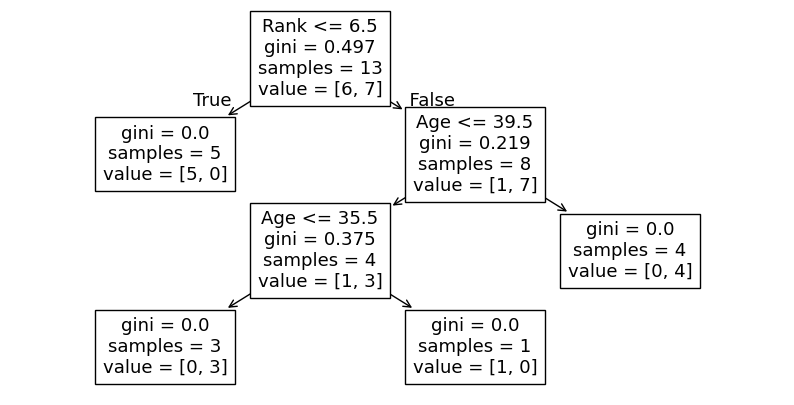

In [8]:
np.random.seed(3)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x, y)

plt.figure(figsize=(10,5))
tree.plot_tree(dtree, feature_names= ["Age", "Experience", "Rank", "Nationality"])
plt.show()

### نتیجه

درخت تصمیم از تصمیمات قبلی شما برای محاسبه احتمال اینکه بخواهید به دیدن یک کمدین بروید یا نه، استفاده می‌کند

# رتبه
___
Rank <= 6.5 / را دنبال می‌کنند True فلش (سمت چپ) را دنبال می‌کند و بقیه هم False ،یعنی هر کمدینی که رتبه ۶.۵ یا پایین‌تر داشته باشد
___
gini = 0.497 / به کیفیت تقسیم اشاره دارد و همیشه عددی بین ۰.۰ و ۰.۵ است، 

مقدار جینی = 0: ناخالصی صفر (همه نمونه‌ها در یک دسته قرار دارند)

مقدار جینی = 0.5: بیشترین ناخالصی (توزیع کاملاً یکنواخت)

___
samples = 13 / یعنی در این مرحله از تصمیم‌گیری، ۱۳ کمدین باقی مانده‌اند که از آنجایی که این اولین قدم است، همه آنها باقی می‌مانند
___
value = [6, 7] / یعنی از این ۱۳ کمدین، به ۶ نفر «نه» و به ۷ نفر «جواب مثبت» داده می‌شود
___

#  GINI
روش‌های زیادی برای تقسیم نمونه‌ها وجود دارد

ما در این آموزش از روش جینی استفاده می‌کنیم
___
### Gini = 1 - (x/n)2 - (y/n)2
___
x= ("NO") تعداد پاسخ‌های منفی 

y= تعداد نمونه‌ها

n= ("GO") تعداد پاسخ‌های مثبت
___

1 - (7 / 13)2 - (6 / 13)2 = 0.497



# مرحله‌ی بعد
مرحله بعدی شامل دو جعبه است، یک جعبه برای کمدین‌هایی با «رتبه» ۶.۵ یا کمتر، و یک جعبه برای بقیه

### درست - 5 کمدین اینجا به پایان می‌رسند
___

gini = 0.0 / یعنی همه نمونه‌ها نتیجه یکسانی داشتند

samples = 5 / یعنی ۵ کمدین در این شاخه باقی مانده‌اند(۵ کمدین با رتبه ۶.۵ یا کمتر) 

value = [5, 0] / یعنی به ۵ «نه» و به ۰ «برو» داده می‌شود
___

### غلط - 8 کمدین ادامه می‌دهند
### ملیت
___
Nationality <= 0.5 /
یعنی کمدین‌هایی که مقدار ملیتشان کمتر از ۰.۵ است، فلش سمت چپ (که یعنی همه اهل بریتانیا هستند) را دنبال می‌کنند 

و بقیه فلش سمت راست را دنبال می‌کنند


gini = 0.219 / یعنی حدود ۲۲٪ از نمونه‌ها به یک جهت می‌روند

samples = 8 / یعنی ۸ کمدین در این شاخه باقی مانده‌اند (۸ کمدین با رتبه بالاتر از ۶.۵).

value = [1, 7] / یعنی از این ۸ کمدین، به ۱ نفر «نه» و به ۷ نفر «جواب مثبت» داده می‌شود
___

### درست - 4 کمدین ادامه می‌دهند
### سن
___

Age <= 35.5یعنی کمدین‌های ۳۵.۵ سال یا کمتر، پیکان سمت چپ و بقیه پیکان سمت راست را دنبال می‌کنند

gini = 0.375یعنی حدود ۳۷.۵٪ نمونه‌ها به یک جهت می‌روند

samples = 4یعنی ۴ کمدین در این شاخه باقی مانده‌اند (۴ کمدین از بریتانیا)

value = [1, 3]یعنی از بین این ۴ کمدین، به ۱ نفر «نه» و به ۳ نفر «جواب مثبت» داده می‌شود
___

### غلط - 4 کمدین در اینجا به پایان می‌رسند
___

gini = 0.0 / یعنی همه نمونه‌ها نتیجه یکسانی داشتند

samples = 4 / یعنی ۴ کمدین در این شاخه باقی مانده‌اند (۴ کمدین که اهل بریتانیا نیستند)

value = [0, 4] / یعنی از بین این ۴ کمدین، به ۰ نفر «نه» و به ۴ نفر «جواب مثبت» داده می‌شود
___

... و

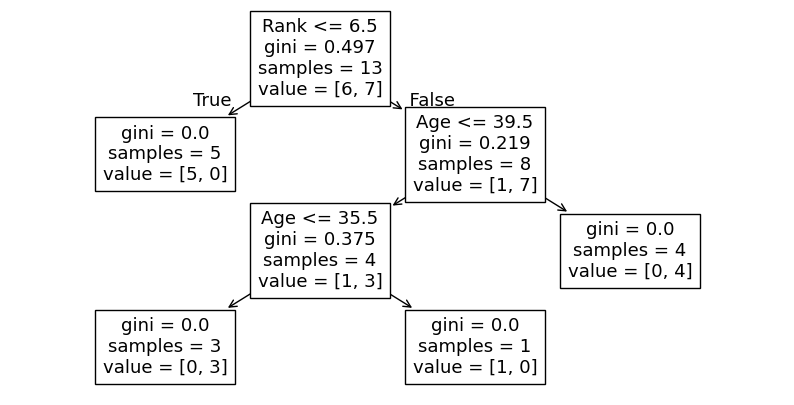

In [9]:
np.random.seed(3)

plt.figure(figsize=(10,5))
tree.plot_tree(dtree, feature_names= ["Age", "Experience", "Rank", "Nationality"])
plt.show()

# مقادیر پیش‌بینی‌شده
مثال: آیا باید به تماشای نمایشی بروم که یک کمدین آمریکایی ۴۰ ساله، با ۱۰ سال سابقه کار و رتبه ۷ در کمدین‌ها در آن بازی می‌کند؟

In [10]:
print(dtree.predict([[40, 10, 7, 1]])) 

[1]


c:\Users\mrb\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


مثال: اگر رتبه کمدی ۶ بود، جواب چه می‌شد؟

In [11]:
i= dtree.predict([[40, 10, 6, 1]])

if i == 0:
    print(f"{i} --> means (NO)")
else:
    print(f"{i} --> means (GO)")

[0] --> means (NO)


c:\Users\mrb\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### نتایج متفاوت
خواهید دید که اگر درخت تصمیم را به دفعات کافی اجرا کنید، حتی اگر داده‌های یکسانی به آن بدهید، نتایج متفاوتی به شما می‌دهد

زیرا درخت تصمیم یک پاسخ ۱۰۰٪ قطعی به ما نمی‌دهد. این روش بر اساس احتمال یک نتیجه عمل می‌کند و پاسخ آن متفاوت خواهد بود

___

## جنگل تصادفی

### مرور سریع
- **جنگل تصادفی** یک روش $ensemble$ است که `چندین درخت تصمیم را ترکیب می‌کند` تا دقت را بهبود بخشد و $overfitting$ را کاهش دهد.
- هر درخت بر روی `زیرمجموعه‌های تصادفی` از داده‌ها و ویژگی‌ها آموزش می‌بیند و پیش‌بینی‌های آنها `متوسط‌گیری` می‌شود تا عملکرد بهتری حاصل شود.
- این روش $robust$ است، واریانس را کاهش می‌دهد و هم برای طبقه‌بندی و هم رگرسیون به خوبی کار می‌کند.

### مراحل ایجاد یک جنگل تصادفی
1. $Bagging$: نمونه‌گیری تصادفی از زیرمجموعه‌های داده (با جایگزینی) برای هر درخت
2. برای هر درخت، در هر تقسیم، یک زیرمجموعه تصادفی از ویژگی‌ها انتخاب کنید
3. یک درخت تصمیم روی هر مجموعه داده نمونه‌گیری شده آموزش دهید
4. مراحل 1-3 را برای ساخت چندین درخت تصمیم تکرار کنید
5. $Aggregating$: برای پیش‌بینی، خروجی تمام درختان را تجمیع کنید (مثلاً رأی اکثریت برای طبقه‌بندی یا میانگین‌گیری برای رگرسیون)

___

In [12]:
from sklearn.utils import resample

class RandomForest:
    """
    A random forest classifier for multi-class classification problems (using decision stumps with depth 1).
    """
    
    def __init__(self, n_trees=7):
        self.n_trees = n_trees
        self.trees = []

    def fit(self, X, y):
        """
        Fits a random forest to the dataset (X, y).
        """
        self.trees = []
        for _ in range(self.n_trees):
            stump = DecisionStump()
            X_sample, y_sample = self._bootstrap_samples(X, y)
            stump.fit(X_sample, y_sample)
            self.trees.append(stump)

    def predict(self, X):
        """
        Predicts class labels for samples in X.
        """
        stump_predictions = np.array([stump.predict(X) for stump in self.trees])
        return self._majority_vote(stump_predictions)
    
    def _bootstrap_samples(self, X, y):
        """
        Applies bootstrap resampling to the dataset.
        """
        return resample(X, y, n_samples=len(X), replace=True)
    
    def _majority_vote(self, predictions):
        """
        Returns the majority vote of the predictions.
        """
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)


در این بخش، از مجموعه داده `سرطان پستان ویسکانسین (تشخیصی)` استفاده خواهیم کرد که یک مجموعه داده طبقه‌بندی دودویی است
<br><br>
**ویژگی‌های مجموعه داده**:
- تعداد نمونه‌ها: ۵۶۹
- تعداد ویژگی‌ها: ۳۰ ویژگی عددی و پیش‌بیننده به همراه کلاس
<br><br>
**اطلاعات ویژگی‌ها**:
- شعاع (میانگین فاصله از مرکز تا نقاط روی محیط)
- بافت (انحراف معیار مقادیر خاکستری)
- محیط
- مساحت
- صافی (تغییرات محلی در طول شعاع)
- فشردگی (محیط^۲ / مساحت - ۱.۰)
- تقعر (شدت بخش‌های مقعر از کانتور)
- نقاط مقعر (تعداد بخش‌های مقعر از کانتور)
- تقارن
- بعد فرکتال ("تقریب خط ساحلی" - ۱)
<br><br>
- **کلاس**:
    - $WDBC$ - **بدخیم**
    - $WDBC$ - **خوش‌خیم**

میانگین، خطای استاندارد و "بدترین" یا بزرگترین مقادیر (میانگین سه مقدار بدترین/بزرگترین) این ویژگی‌ها برای هر تصویر محاسبه شده که منجر به ۳۰ ویژگی شده است. برای مثال، فیلد $0$ میانگین شعاع، فیلد $10$ خطای استاندارد شعاع و فیلد $20$ بدترین شعاع است

In [13]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X, y = breast_cancer.data, breast_cancer.target

print(f"Breast Cancer features: {breast_cancer.feature_names}")
print(f"Breast Cancer target: {breast_cancer.target_names}")

Breast Cancer features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Breast Cancer target: ['malignant' 'benign']


اکنون می‌توانیم مجموعه داده را به مجموعه‌های آموزش و آزمون تقسیم کنیم

همچنین مطمئن شوید که $y$ تغییر شکل داده شده باشد تا از بروز خطاهای بعدی در طول آموزش مدل جلوگیری شود

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}, y_test: {y_test.shape}")

Shape of X_train: (455, 30), y_train: (455,)
Shape of X_test: (114, 30), y_test: (114,)


اکنون می‌توانیم مدل سفارشی $RandomForest()$ را آموزش داده و عملکرد آن را با استفاده از هر دو معیار $accuracy_score$ و $f1_score$ ارزیابی کنیم

In [15]:
from sklearn.metrics import accuracy_score, f1_score

rf_custom = RandomForest()
rf_custom.fit(X_train, y_train)

rf_cust_predictions = rf_custom.predict(X_test)

print(f"Custom RF Accuracy: {accuracy_score(y_test, rf_cust_predictions):.3f}")
print(f"Custom RF F1-Score: {f1_score(y_test, rf_cust_predictions, average="weighted"):.3f}")

Custom RF Accuracy: 0.921
Custom RF F1-Score: 0.921


### $Scikit-learn$ استفاده از طبقه‌بند جنگل تصادفی 

پس از پیاده‌سازی جنگل تصادفی سفارشی از پایه، اکنون نتایج را با استفاده از کتابخانه $Scikit-learn$ مقایسه خواهیم کرد که یک پیاده‌سازی بهینه‌شده از جنگل‌های تصادفی ارائه می‌دهد. این به ما امکان می‌دهد رفتار جنگل‌های تصادفی را بدون مواجهه با پیچیدگی‌های ساخت دستی آن مشاهده کنیم. ما همچنین درختان تصمیم استفاده شده در جنگل تصادفی را تجسم خواهیم کرد تا بینشی از نحوه تصمیم‌گیری آن به دست آوریم.

*مطمئن شوید که ترکیب‌های مختلف ابرپارامترها ($n_estimators, max_depth, min_samples$ و غیره) را امتحان کنید*

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_sklearn = RandomForestClassifier(n_estimators=7, max_depth=1, criterion="entropy", random_state=42)
rf_sklearn.fit(X_train, y_train.ravel())

rf_skl_predictions = rf_sklearn.predict(X_test)

print(f"Sklearn RF Accuracy: {accuracy_score(y_test, rf_skl_predictions):.3f}")
print(f"Sklearn RF F1-Score: {f1_score(y_test, rf_skl_predictions, average="weighted"):.3f}")

Sklearn RF Accuracy: 0.939
Sklearn RF F1-Score: 0.938


In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# for idx, tree in enumerate(rf_sklearn.estimators_):
#     plt.figure(figsize=(8,6))
#     plot_tree(tree, filled=True, feature_names=list(breast_cancer.feature_names), class_names=list(breast_cancer.target_names))
#     plt.title(f"Random Forest Visualization - Tree {idx + 1}")
#     plt.tight_layout()
#     plt.show()

اکنون یک نمونه تصادفی برای نمایش انتخاب کنید

In [18]:
sample_idx = 112

pd.set_option("display.max_columns", None)
pd.DataFrame(X_test[112].reshape(1, -1), columns=breast_cancer.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,14.22,27.85,92.55,623.9,0.08223,0.1039,0.1103,0.04408,0.1342,0.06129,0.3354,2.324,2.105,29.96,0.006307,0.02845,0.0385,0.01011,0.01185,0.003589,15.75,40.54,102.5,764.0,0.1081,0.2426,0.3064,0.08219,0.189,0.07796


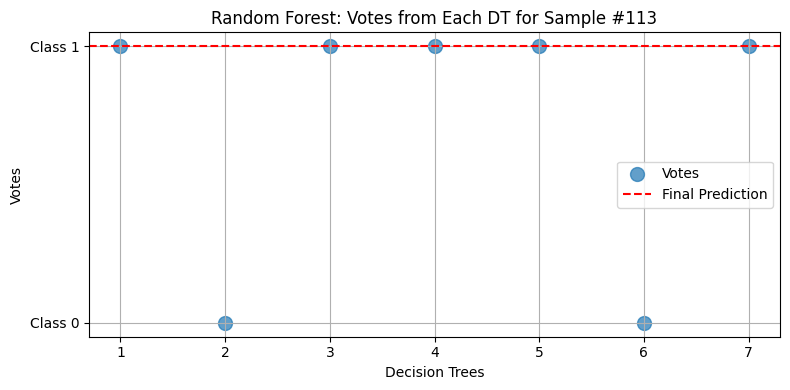

In [19]:
votes = [tree.predict(X_test[112].reshape(1, -1)) for tree in rf_sklearn.estimators_]
final_prediction = rf_sklearn.predict(X_test[sample_idx].reshape(1, -1))[0]

plt.figure(figsize=(8, 4))
plt.scatter([range(1, len(rf_sklearn.estimators_) + 1)], votes, s=100, alpha=0.7, label="Votes")
plt.axhline(y=final_prediction, color="r", linestyle="--", label="Final Prediction")
plt.yticks([0, 1], ["Class 0", "Class 1"])
plt.xlabel("Decision Trees")
plt.ylabel("Votes")
plt.title(f"Random Forest: Votes from Each DT for Sample #{sample_idx + 1}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<h2>می‌خواهید بیشتر یاد بگیرید؟</h2>

پلتفرم **هوکو** یک بستر جامع تحلیلی و هوش مصنوعی است که مجموعه‌ای از الگوریتم‌های یادگیری ماشین، ابزارهای تحلیل داده و راهکارهای پیش‌بینی هوشمند را در اختیار شما قرار می‌دهد.
این پلتفرم به شما کمک می‌کند تا تصمیم‌های دقیق‌تر، سریع‌تر و مبتنی بر داده بگیرید؛ 

چه به‌صورت فردی، چه در سطح تیمی و یا در مقیاس سازمانی

___

اکنون می‌توانید نسخه آزمایشی رایگان هوکو را فعال کرده و قدرت هوش مصنوعی را در تصمیم‌گیری‌های خود تجربه کنید

 <a href="https://hooko.ir">HOOKO.ir شروع تجربه در </a>

 ___

## Author

Mahdi Fatemi (HAKAN)

## web
www.hooko.ir

## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2025-11-06 | 1.0  | HAKAN Fatemi  |  ... |

## <h3 align="center"> © HOOKO.IR Corporation. All rights reserved. <h3/>
